


#All the imports we need




In [ ]:
import numpy as np
import pydot
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from IPython.display import Image
from io import StringIO
from sklearn import metrics
from sklearn.metrics import mean_squared_error

##Data loading

In [ ]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-12 12:23:22--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-12 12:23:22--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.4’

train.csv.4         100%[===================>]   4.71M  --.-KB/s    in 0.05s   

2022-01-12 12:23:22 (94.9 MB/s) - ‘train.csv.4’ saved [4942050/4942050]



In [ ]:
df = pd.read_csv("train.csv")

##Preprocessing

Once we have downloaded train.csv, the first thing we are going to do is to remove the null values from this file.

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

The next step is to transform the categorical features into numerical features.

In [ ]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])

In [ ]:
df_full = pd.concat([df, df_OneHot], axis = 1)

# 1. BaseLine (kNN or DecisionTrees)

To create the baseline we will follow these points:
- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


##Feature selection

For the feature selection we decided to exclude categorical, text-based and date-based features. In this context they are **'Gender', 'MaritalStatus', 'PartialFullTime', 'ClaimDescription', 'DateReported', 'DateTimeOfAccident', 'ClaimNumber', 'PartTimeFullTime'.**

In [ ]:
exclude = ['Gender', 'MaritalStatus', 'PartialFullTime', 'ClaimDescription', 'DateReported', 'DateTimeOfAccident', 'ClaimNumber', 'PartTimeFullTime']
df_feature_selected = df_full.loc[:, df_full.columns.difference(exclude)]
df_feature_selected

,Age,DaysWorkedPerWeek,DependentChildren,DependentsOther,Gender_F,Gender_M,Gender_U,HoursWorkedPerWeek,InitialIncurredCalimsCost,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P,UltimateIncurredClaimCost,WeeklyWages
0,48,5,0,0,0,1,0,38.0,1500,1,0,0,1,0,4748.203388,500.00
1,43,5,0,0,1,0,0,37.5,5500,1,0,0,1,0,6326.285819,509.34
2,30,5,0,0,0,1,0,38.0,1700,0,0,1,1,0,2293.949087,709.10
3,41,5,0,0,0,1,0,38.0,15000,0,1,0,1,0,17786.487170,555.46
4,36,5,0,0,0,1,0,38.0,2800,1,0,0,1,0,4014.002925,377.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,20,5,0,0,1,0,0,40.0,1400,0,1,0,1,0,1343.054886,344.16
36172,35,7,0,0,0,1,0,71.0,1000,1,0,0,1,0,172876.632600,1668.83
36173,52,4,0,0,1,0,0,20.0,500,1,0,0,0,1,632.281472,204.87
36174,28,5,0,0,0,1,0,38.0,4000,1,0,0,1,0,6714.495760,730.87


##Cross validation

In this cross validation we will use the decision tree algorithm to get the most relevant features and later use them in the kNN algorithm

We decided to divide the dataset into a percentage of **70 for the training** and **30 for the test**, as we have decided to divide it in this way, so the algorithm has more training and will give us good results in the test.

In [ ]:
train, test = train_test_split(df_feature_selected, test_size=0.30, random_state=42)

In [ ]:
train.reset_index(drop = True, inplace = True)
train.head()

,Age,DaysWorkedPerWeek,DependentChildren,DependentsOther,Gender_F,Gender_M,Gender_U,HoursWorkedPerWeek,InitialIncurredCalimsCost,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P,UltimateIncurredClaimCost,WeeklyWages
0,26,5,0,0,0,1,0,38.0,5000,0,0,1,1,0,8025.642527,200.00
1,27,5,0,0,1,0,0,38.0,13000,0,1,0,1,0,9977.454905,621.15
2,54,5,0,0,0,1,0,40.0,2300,1,0,0,1,0,3771.863681,606.00
3,25,5,0,0,0,1,0,40.0,500,0,1,0,1,0,771.820974,641.76
4,35,5,0,0,0,1,0,38.0,600,1,0,0,1,0,1392.230277,414.00


##Decision tree

We will now perform the decision tree procedure with several values of "max_depth" to determine the **Min MAE Value**, which will be used as the **maximum depth** in order to generate the decision tree model.

No handles with labels found to put in legend.


Min Value : 7910.285724290086 (4)


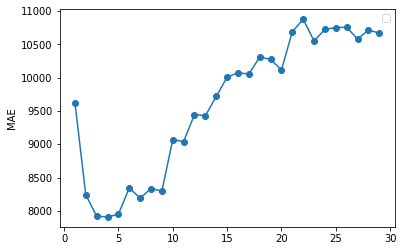

In [ ]:
cv = KFold(n_splits = 10, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(f_train.drop(['UltimateIncurredClaimCost'], axis=1), f_train['UltimateIncurredClaimCost'])
          y_pred = regr.predict(f_test.drop(['UltimateIncurredClaimCost'], axis=1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['UltimateIncurredClaimCost'], y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

As we have explained previously, the result obtained in this case is 4, as we can see in the graph above, and now with that result we assume it as the maximum depth of the tree.

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth = 4)
regr.fit(f_train.drop(['UltimateIncurredClaimCost'], axis=1), f_train['UltimateIncurredClaimCost'])

DecisionTreeRegressor(max_depth=4)

We display the decision tree created and we observe that one of the leaves has a **darker colour** than the others, this is because the **quadratic error is negative** and **there are no samples**, because it has a 0.0%. 

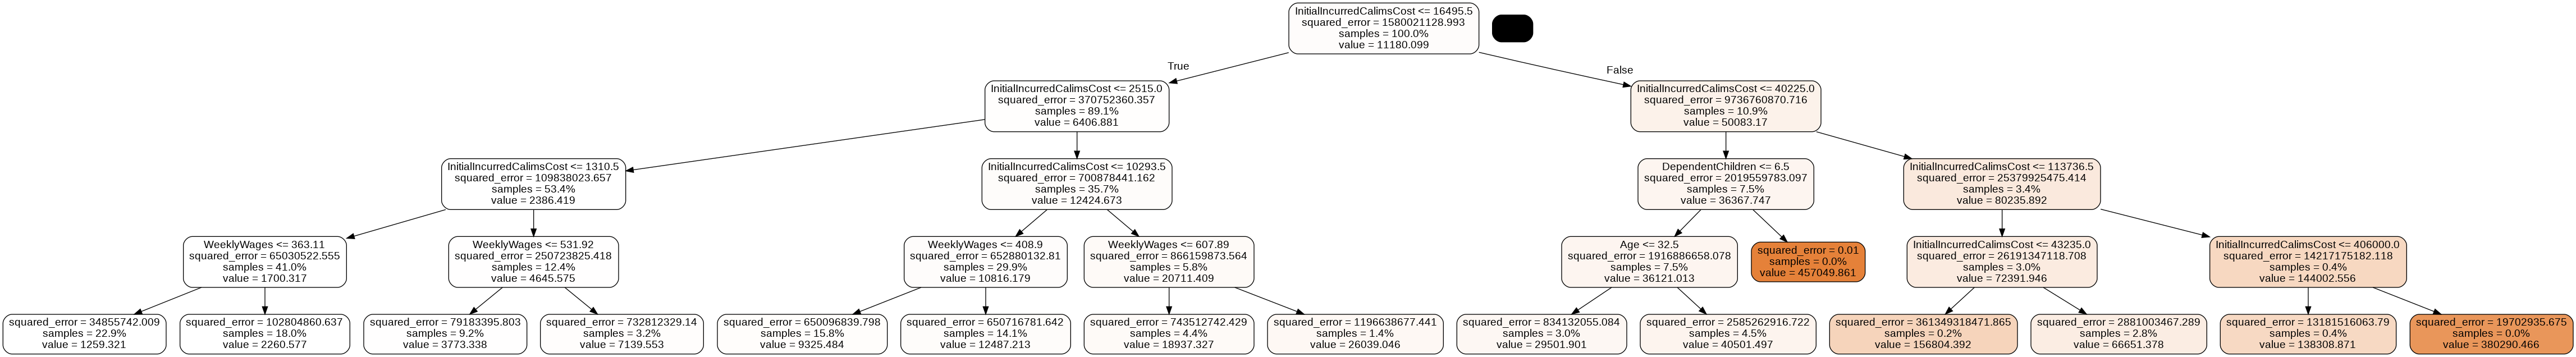

In [ ]:
dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=["Age","DaysWorkedPerWeek", "DependentChildren", "DependentsOther", "Gender_F", "Gender_M", "Gender_U", "HoursWorkedPerWeek", "InitialIncurredCalimsCost", "MaritialStatus_M", "MaritialStatus_F", "MaritialStatus_U", "PartialTimeFullTime_F", "PartialTimeFullTime_P", "WeeklyWages"], 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

We will now predict the results, using the decision tree shown above, and the prediction will be displayed as a plot.

In [ ]:
y_pred = regr.predict(test.drop(['UltimateIncurredClaimCost'], axis=1))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


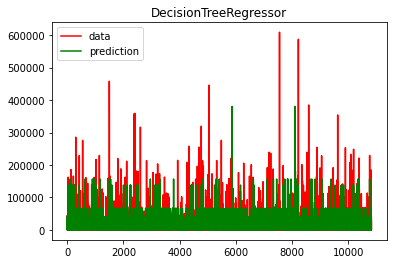

In [ ]:
# x axis for plotting
xx = np.stack(i for i in range(test['UltimateIncurredClaimCost'].shape[0]))
plt.plot(xx, test['UltimateIncurredClaimCost'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("DecisionTreeRegressor")

plt.show()

**Remark**: As we can see in the plot, the prediction is very close to the data, but we notice that when there is very large data, the prediction fails to reach them.

Now we consult the most relevant features.

In [ ]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ("Age","DaysWorkedPerWeek", "DependentChildren", "DependentsOther", "Gender_F", "Gender_M", "Gender_U", "HoursWorkedPerWeek", "InitialIncurredCalimsCost", "MaritialStatus_M", "MaritialStatus_F", "MaritialStatus_U", "PartialTimeFullTime_F", "PartialTimeFullTime_P", "WeeklyWages") ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.007101
1,DaysWorkedPerWeek,0.000000
2,DependentChildren,0.025436
3,DependentsOther,0.000000
4,Gender_F,0.000000
5,Gender_M,0.000000
6,Gender_U,0.000000
7,HoursWorkedPerWeek,0.000000
8,InitialIncurredCalimsCost,0.962034
9,MaritialStatus_M,0.000000


**Note:** We can see that the **most relevant** feature of all is **InitialIncurredCalimsCost**, followed by 3 others ("**DependentChildren", "WeeklyWages" and "Age"**), as InitialIncurredCalimsCost is the largest of all, we have decided to exclude it later to perform the same procedure and check how the results will change.

We **evaluate** the prediction of the decision tree

In [ ]:
y_pred = regr.predict(test.drop(['UltimateIncurredClaimCost'], axis=1))

print ("MAE:", metrics.mean_absolute_error(y_pred , test["UltimateIncurredClaimCost"]))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , test["UltimateIncurredClaimCost"]))
print ("MSE:", metrics.mean_squared_error(y_pred , test["UltimateIncurredClaimCost"]))
print ("R^2:", metrics.r2_score(y_pred , test["UltimateIncurredClaimCost"]))

MAE: 7628.323595052368
MAPE: 0.7882356660287678
MSE: 542146624.1969979
R^2: -0.6521451506335594


Now we are going to repeate this process **removing InitialIncurredCalimsCost** feature in order to see the relevance of the other features due to InitialIncurredCalimsCost hoards almost the whole relevance

In [ ]:
train_without_initial, test_without_initial = train_test_split(df_feature_selected.drop(['InitialIncurredCalimsCost'], axis=1), test_size=0.30, random_state=42)

train_without_initial.reset_index(drop = True, inplace = True)

No handles with labels found to put in legend.


Min Value : 12044.859635549792 (4)


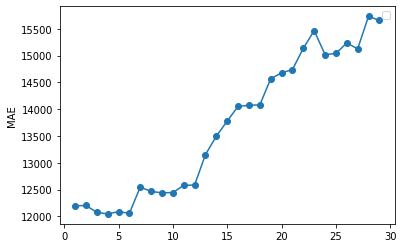

In [ ]:
cv = KFold(n_splits = 10, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(train_without_initial):
          # División train test aleatoria
          f_train = train_without_initial.loc[train_fold]
          f_test = train_without_initial.loc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(f_train.drop(['UltimateIncurredClaimCost'], axis=1), f_train['UltimateIncurredClaimCost'])
          y_pred = regr.predict(f_test.drop(['UltimateIncurredClaimCost'], axis=1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['UltimateIncurredClaimCost'], y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In this case, the **Min Value** and the maximum depth is 4

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth = 4)
regr.fit(f_train.drop(['UltimateIncurredClaimCost'], axis=1), f_train['UltimateIncurredClaimCost'])

DecisionTreeRegressor(max_depth=4)

As before, we looked for the most relevant features to see if they have changed from the previous results.

In [ ]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ("Age","DaysWorkedPerWeek", "DependentChildren", "DependentsOther", "Gender_F", "Gender_M", "Gender_U", "HoursWorkedPerWeek", "MaritialStatus_M", "MaritialStatus_F", "MaritialStatus_U", "PartialTimeFullTime_F", "PartialTimeFullTime_P", "WeeklyWages") ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.059532
1,DaysWorkedPerWeek,0.000000
2,DependentChildren,0.115948
3,DependentsOther,0.042435
4,Gender_F,0.000000
5,Gender_M,0.000000
6,Gender_U,0.000000
7,HoursWorkedPerWeek,0.024373
8,MaritialStatus_M,0.000000
9,MaritialStatus_F,0.000000


And it is correct, by excluding InitialIncurredCalimsCost, we have obtained that some variables that had no previous data have it now, such as "**HoursWorkedPerWeek**" and also, **those that were there before have increased.**

#kNN

Firstly, we try the kNN algorithm with **every feature** except the excluded ones

Now we calculate **manhatan (p=1)** and **euclidean (p=2)** distancie metric


Manhattan Distance

Min Value uniform : 7996.817784238905 (34)
Min Value distance : 8113.57316270724 (34)


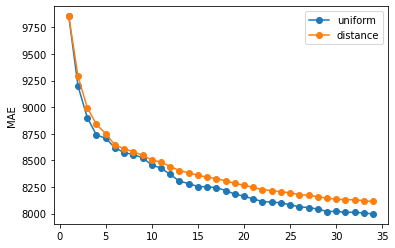

Euclidean Distance

Min Value uniform : 8014.4951223151875 (34)
Min Value distance : 8142.614570204363 (34)


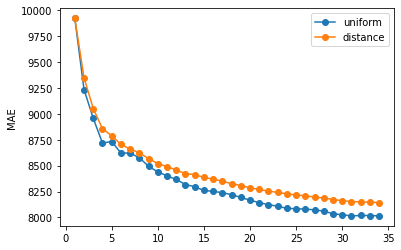

In [ ]:
cv = KFold(n_splits = 10, shuffle = False) 
for p in [1,2]:
  if p==1:
        print('Manhattan Distance\n')
  else:
        print('Euclidean Distance\n')
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,35):
        fold_accuracy = []
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights,p=p)#p=1 manhattan
        # verificar cada uno de los modelos con validación cruzada.
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]
            # entrenamiento y ejecución del modelo
            knn.fit( X = f_train.drop(['UltimateIncurredClaimCost'], axis=1), 
                                y = f_train['UltimateIncurredClaimCost'])
            y_pred = knn.predict(X = f_test.drop(['UltimateIncurredClaimCost'], axis = 1))
            # evaluación del modelo
            mae = mean_absolute_error(f_test['UltimateIncurredClaimCost'], y_pred)
            fold_accuracy.append(mae)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
    
    plt.plot(range(1,len(total_scores)+1), total_scores, 
              marker='o', label=weights)
    

    print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')      
      

  plt.legend()
  plt.show()

You can see that **the number of neighbours is very close to the limit** and we have to change it with other values that we have already checked, for example 50, 60, 80,100 and 110 we saw that it is **continues closed to the limit** **but we decided to set it in 35**, but we want to point out that **we have also proved it with more neighbours**.

Manhattan Distance

Min Value uniform : 7756.310126682532 (109)
Min Value distance : 7902.287648163314 (109)


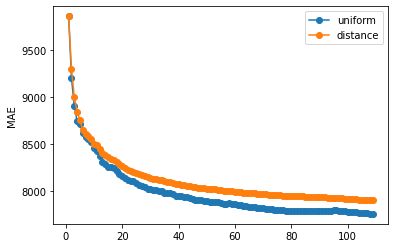

Euclidean Distance

Min Value uniform : 7767.808782352321 (109)
Min Value distance : 7933.411159179319 (109)


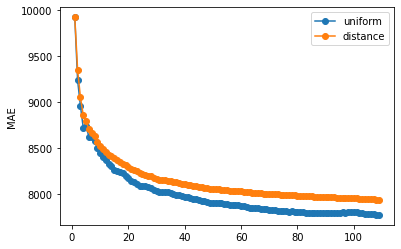

In [ ]:
cv = KFold(n_splits = 10, shuffle = False) 
for p in [1,2]:
  if p==1:
        print('Manhattan Distance\n')
  else:
        print('Euclidean Distance\n')
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,110):
        fold_accuracy = []
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights,p=p)#p=1 manhattan
        # verificar cada uno de los modelos con validación cruzada.
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.loc[train_fold]
            f_test = train.loc[test_fold]
            # entrenamiento y ejecución del modelo
            knn.fit( X = f_train.drop(['UltimateIncurredClaimCost'], axis=1), 
                                y = f_train['UltimateIncurredClaimCost'])
            y_pred = knn.predict(X = f_test.drop(['UltimateIncurredClaimCost'], axis = 1))
            # evaluación del modelo
            mae = mean_absolute_error(f_test['UltimateIncurredClaimCost'], y_pred)
            fold_accuracy.append(mae)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
    
    plt.plot(range(1,len(total_scores)+1), total_scores, 
              marker='o', label=weights)
    

    print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')      
      

  plt.legend()
  plt.show()

As we can see in the previous results, the lowest error value is obtained with **34 neighbours** using uniform weights with **manhattan distance metric**, so we are going to use these parameters

In [ ]:
# constructor
n_neighbors = 34
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, p=1) 
# fit and predict

knn.fit( X = train.drop(['UltimateIncurredClaimCost'], axis=1), y = train['UltimateIncurredClaimCost'])
y_pred = knn.predict(X = test.drop(['UltimateIncurredClaimCost'], axis = 1))
mae = mean_absolute_error(test['UltimateIncurredClaimCost'], y_pred)
mse = mean_squared_error(test['UltimateIncurredClaimCost'], y_pred)
print ('MAE', mae)
print ('MSE', mse)

MAE 7471.967730507512
MSE 514414872.66459227


As can be observed in the results we can confirm that with the manhattan distance metric a **low MSE** is obtained.

We visualize the results with a plot

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


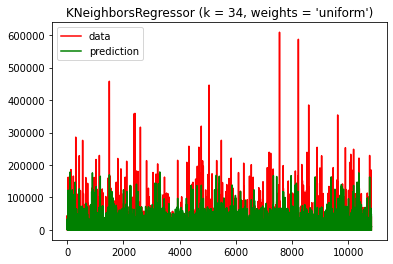

In [ ]:
# x axis for plotting
xx = np.stack(i for i in range(test['UltimateIncurredClaimCost'].shape[0]))
plt.plot(xx, test['UltimateIncurredClaimCost'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

Secondly, we try kNN with the **most** **relevant features** obtained with the Decition Tree algorithm

In [ ]:
df_relevant_features = df_feature_selected[["InitialIncurredCalimsCost", "Age", "DependentChildren", "WeeklyWages", "UltimateIncurredClaimCost"]]
train_relevant, test_relevant = train_test_split(df_relevant_features, test_size=0.30, random_state=42)

In [ ]:
train_relevant.reset_index(drop = True, inplace = True)

As we have previously done, we try kNN with **Manhattan metric** and then with **Euclidean metric**

Manhattan Distance

Min Value uniform : 7979.661947180471 (34)
Min Value distance : 8234.190697490885 (34)


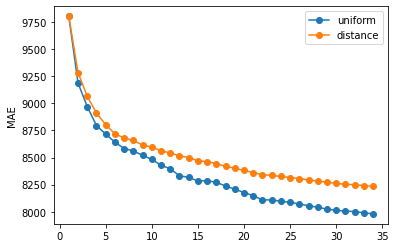

Euclidean Distance

Min Value uniform : 8009.352718170665 (34)
Min Value distance : 8249.341235672182 (34)


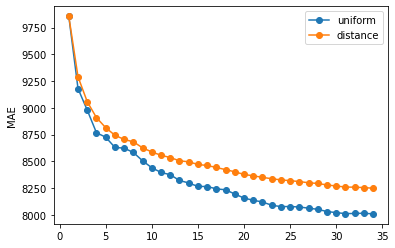

In [ ]:
cv = KFold(n_splits = 10, shuffle = False) 

for p in [1,2]:
  if p==1:
        print('Manhattan Distance\n')
  else:
        print('Euclidean Distance\n')
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,35):
        fold_accuracy = []
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, p=p)#p=1 manhattan
        # verificar cada uno de los modelos con validación cruzada.
        for train_fold, test_fold in cv.split(train_relevant):
            # División train test aleatoria
            f_train = train_relevant.loc[train_fold]
            f_test = train_relevant.loc[test_fold]
            # entrenamiento y ejecución del modelo
            knn.fit( X = f_train.drop(['UltimateIncurredClaimCost'], axis=1), 
                                y = f_train['UltimateIncurredClaimCost'])
            y_pred = knn.predict(X = f_test.drop(['UltimateIncurredClaimCost'], axis = 1))
            # evaluación del modelo
            mae = mean_absolute_error(f_test['UltimateIncurredClaimCost'], y_pred)
            fold_accuracy.append(mae)
        total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
    
    plt.plot(range(1,len(total_scores)+1), total_scores, 
              marker='o', label=weights)
    print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')      
    

  plt.legend()
  plt.show() 

**The best result** is obtained with **34 neighbours**, the **4 most relevant features** and **uniform weights** with manhattan distance metric

In [ ]:
# constructor
n_neighbors = 34
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, p=1) 
# fit and predict

knn.fit( X = train_relevant.drop(['UltimateIncurredClaimCost'], axis=1), y = train_relevant['UltimateIncurredClaimCost'])
y_pred = knn.predict(X = test_relevant.drop(['UltimateIncurredClaimCost'], axis = 1))
mae = mean_absolute_error(test_relevant['UltimateIncurredClaimCost'], y_pred)
mse = mean_squared_error(test_relevant['UltimateIncurredClaimCost'], y_pred)
print ('MAE', mae)
print ('MSE', mse)

MAE 7474.224404710796
MSE 514076863.3420578


As we can see, the **MSE is lower for the 4 most relevant features** than for all of them like in the previous results.

As we did before, we visualise the results using a plot

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


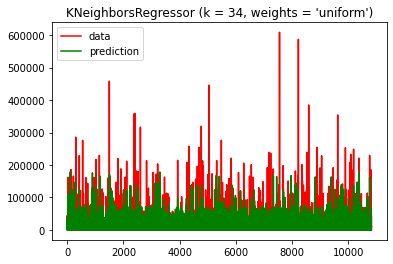

In [ ]:
# x axis for plotting
xx = np.stack(i for i in range(test['UltimateIncurredClaimCost'].shape[0]))
plt.plot(xx, test['UltimateIncurredClaimCost'], c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

##Conclusion
The first thing we are going to comment is about the decision tree. The first one we have done with all the features in which we get that its **Min Value is 4**, with this 4 we assign it as the **maximum depth** of our tree, once we have the complete tree, we make the prediction with that we show it in a plot and we can observe that the predictions are very close to the data but when these are very high they are not able to reach them. After this, we check the most relevant features that at the beginning are 4 (named previously), but the one that is the **most relevant is InitialIncurredCalimsCost. **

Then we repeat the tests again **without the InitialIncurredCalimsCost** feature, in order to find others that were not shown such as **HoursWorkedPerWeek** and the others that were also increased.


We will now comment on what happened with the kNN.
The first thing we have tried with the kNN is to find the neighbours and the **type of distance (Manhattan or Euclidean)** that give us a low MAE and a low MSE. During this process we have faced two situations: The first one when we did the kNN the results gave us very near to the limits, so we tried different neighbours but when we saw that we needed high ones we set it to 35. The second situation is that we managed to find a low MAE and MSE, obtained with the **manhattan distance and with 34 neighbours**.

The next thing we have tried is to test the kNN with the 4 most relevant features to test what happened with the MAE and the MSE and we have found that the **MSE** is actually slightly **reduced** from **514414872.664 to 514076863.342** and on the other hand the **MAE increases** from **7471.967 to 7474.224.**
